# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [0]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random
from __future__ import print_function

In [0]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [0]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [0]:
# (@_@-  Needs blow away the existing default graph with all variables
# https://github.com/tensorflow/tensorflow/issues/859
tf.reset_default_graph()

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# (@_@-  Variables are declared inside a function with a variable_scope.
def regressor(x):
    # Set model weights
    with tf.variable_scope("regressor"):
        W = tf.Variable(rng.randn(), name="weight")
        b = tf.Variable(rng.randn(), name="bias")
        
    # (@_@-  Announce the variable names when this function is called.
    print(W.name, b.name)

    return tf.add(tf.multiply(x, W), b)

In [42]:
pred = regressor(X)

regressor_2/weight:0 regressor_2/bias:0


In [0]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [0]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050, cost = 0.354830921, W = -1.007353, b = -0.080795
Epoch: 0100, cost = 0.322739452, W = -1.007353, b = -0.080795
Epoch: 0150, cost = 0.294354469, W = -1.007353, b = -0.080795
Epoch: 0200, cost = 0.269246280, W = -1.007353, b = -0.080795
Epoch: 0250, cost = 0.247037306, W = -1.007353, b = -0.080795
Epoch: 0300, cost = 0.227392495, W = -1.007353, b = -0.080795
Epoch: 0350, cost = 0.210016355, W = -1.007353, b = -0.080795
Epoch: 0400, cost = 0.194646418, W = -1.007353, b = -0.080795
Epoch: 0450, cost = 0.181051537, W = -1.007353, b = -0.080795
Epoch: 0500, cost = 0.169026539, W = -1.007353, b = -0.080795
Epoch: 0550, cost = 0.158390358, W = -1.007353, b = -0.080795
Epoch: 0600, cost = 0.148982480, W = -1.007353, b = -0.080795
Epoch: 0650, cost = 0.140661255, W = -1.007353, b = -0.080795
Epoch: 0700, cost = 0.133301139, W = -1.007353, b = -0.080795
Epoch: 0750, cost = 0.126791134, W = -1.007353, b = -0.080795
Epoch: 0800, cost = 0.121033147, W = -1.007353, b = -0.080795
Epoch: 0

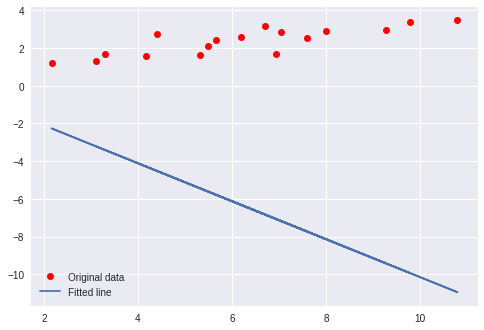

In [45]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data    
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})

            # (@_@-  The internal variables are obtained via the name.
            # https://stackoverflow.com/questions/48255267/how-do-i-print-a-local-tensor-in-tensorflow
            print("Epoch: %04d, cost = %.9f, " %(epoch+1, c), end='')
            print("W = %f, b = %f" %(sess.run(tf.get_default_graph().get_tensor_by_name("regressor/weight:0")),
                                                         sess.run(tf.get_default_graph().get_tensor_by_name("regressor/bias:0"))))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost= %9f" %(training_cost))
    Wopt = sess.run(tf.get_default_graph().get_tensor_by_name("regressor/weight:0"))
    bopt =  sess.run(tf.get_default_graph().get_tensor_by_name("regressor/bias:0"))
    print("W = %f, b = %f" %(Wopt, bopt))

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, Wopt * train_X + bopt, label='Fitted line')
    plt.legend()
    plt.show()

In [0]:
# Regression result